# Restaurant- Reviews Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"/content/Restaurant_Reviews.tsv",delimiter='\t')#load the data in a variable

In [3]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### Text Mining/ Preprocessing

In [4]:
import re

In [5]:
data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [6]:
review=data['Review'][0]

In [7]:
review

'Wow... Loved this place.'

# What all we need to do?
1. Remove punctuations
2. Lowercase all characters
3. Stop Words (this, and, the) removal
4. Stemming (ex: convert loved, loving to love)

In [8]:
#Remove punctuations
review= re.sub("[^a-zA-Z]"," ",review)

In [9]:
review=review.lower()
review

'wow    loved this place '

#### Next, working with stop words

In [12]:
import nltk
nltk.download('wordnet')
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
sw=stopwords.words("english")

In [14]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
imp_words=['not',"couldn't","didn't","doesn't","hadn't","hasn't","haven't",'don',"don't","aren't",'couldn',
 'didn','doesn','hadn','hasn','haven','isn',"isn't",'mightn',"mightn't",'mustn',
 "mustn't",'needn',"needn't",'shan',"shan't",'shouldn',
 "shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"] #sw that may affect our output should be removed

In [16]:
for words in imp_words:
  sw.remove(words)

In [17]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
#Tokenization
review=review.split()

In [19]:
wl=WordNetLemmatizer()

In [20]:
d=[]
for word in review:
    if word not in sw:
       #StopWords Removal with Stemming
       d.append(wl.lemmatize(word,pos='v')) 

In [21]:
d

['wow', 'love', 'place']

In [22]:
review=' '.join(d)
review

'wow love place'

### Similar steps has to be applied for all the reviews.


In [23]:
data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [25]:
corpus=[]
for i in range(0,1000):
    review=data['Review'][i]
    review= re.sub("[^a-zA-Z]"," ",review)
    review=review.lower()
    review=review.split()
    d=[]
    for word in review:
        if word not in sw:
           d.append(wl.lemmatize(word,pos='v')) 
    review=' '.join(d)
    corpus.append(review)

In [26]:
corpus

['wow love place',
 'crust not good',
 'not tasty texture nasty',
 'stop late may bank holiday rick steve recommendation love',
 'selection menu great price',
 'get angry want damn pho',
 'honeslty didn taste fresh',
 'potatoes like rubber could tell make ahead time keep warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier care ever say still end wayyy overprice',
 'try cape cod ravoli chicken cranberry mmmm',
 'disgust pretty sure human hair',
 'shock sign indicate cash',
 'highly recommend',
 'waitress little slow service',
 'place not worth time let alone vegas',
 'not like',
 'burrittos blah',
 'food amaze',
 'service also cute',
 'could care less interior beautiful',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never bring salad ask',
 'hole wall great mexican street tacos friendly staff',
 'take hour get food table restaurant food luke warm sever run around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger 

## Text Data Visualization

### Word Cloud

In [27]:
from wordcloud import WordCloud

In [28]:
wcloud= WordCloud(background_color="white")

In [29]:
text_review=" ".join(corpus)

In [30]:
text_review

'wow love place crust not good not tasty texture nasty stop late may bank holiday rick steve recommendation love selection menu great price get angry want damn pho honeslty didn taste fresh potatoes like rubber could tell make ahead time keep warmer fry great great touch service prompt would not go back cashier care ever say still end wayyy overprice try cape cod ravoli chicken cranberry mmmm disgust pretty sure human hair shock sign indicate cash highly recommend waitress little slow service place not worth time let alone vegas not like burrittos blah food amaze service also cute could care less interior beautiful perform right red velvet cake ohhh stuff good never bring salad ask hole wall great mexican street tacos friendly staff take hour get food table restaurant food luke warm sever run around like totally overwhelm worst salmon sashimi also combos like burger fry beer decent deal like final blow find place accident could not happier seem like good quick place grab bite familiar 

In [31]:
wc_img=wcloud.generate(text_review)

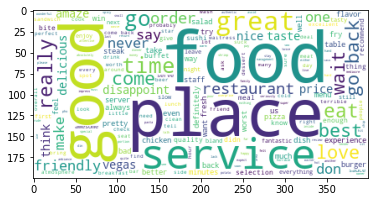

In [32]:
plt.imshow(wc_img)

## Vectorization

##### Bag Of Words


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [34]:
x=cv.fit_transform(corpus).toarray()

In [35]:
x.shape

(1000, 1656)

**1656** is no. of unique words

In [36]:
cv.get_feature_names()

['absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodations',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledge',
 'across',
 'actual',
 'actually',
 'add',
 'affordable',
 'afternoon',
 'ago',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almonds',
 'almost',
 'alone',
 'also',
 'although',
 'always',
 'amaze',
 'ambiance',
 'ambience',
 'amount',
 'ample',
 'andddd',
 'angry',
 'annoy',
 'another',
 'anticipate',
 'anymore',
 'anyone',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app',
 'appal',
 'apparently',
 'appeal',
 'appetite',
 'appetizer',
 'appetizers',
 'apple',
 'approval',
 'area',
 'arepas',
 'aria',
 'around',
 'array',
 'arrive',
 'article',
 'ask',
 'assure',
 'atmosphere',
 'atrocious',
 'attach',
 'attack',
 'attention',
 'attentive',
 'attitudes',
 'auju',
 'authentic',
 'average',
 'avocado',
 'avoid',
 'away',
 'awesome',
 'awful',
 'awkward',
 'awkwardly',
 'ayce',


In [37]:
x_df=pd.DataFrame(x,columns=cv.get_feature_names())

In [38]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
y=data["Liked"]

### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Building ANN Model

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [42]:
#init nn model
model=Sequential()

In [43]:
#Input Layer
model.add(Dense(input_dim=1656,kernel_initializer="random_uniform",activation="relu",units=200))

In [44]:
#Hidden Layer
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=200))

In [45]:
#Output Layer
model.add(Dense(kernel_initializer="random_uniform",activation="sigmoid",units=1))

In [46]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               331400    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 371,801
Trainable params: 371,801
Non-trainable params: 0
_________________________________________________________________


In [48]:
train_history=model.fit(x_train, y_train, batch_size=32,epochs=5)

Epoch 1/5
25/25 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.5700
Epoch 2/5
25/25 [==============================] - 0s 5ms/step - loss: 0.5516 - accuracy: 0.9013
Epoch 3/5
25/25 [==============================] - 0s 5ms/step - loss: 0.2014 - accuracy: 0.9488
Epoch 4/5
25/25 [==============================] - 0s 6ms/step - loss: 0.0536 - accuracy: 0.9900
Epoch 5/5
25/25 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9975


In [49]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [50]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

# Evalute the model

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred)*100

78.5

# Real time Predictions

In [55]:
myreview="I don't like the food"

In [56]:
myreview=np.array([myreview])

In [57]:
myreview=cv.transform(myreview).toarray()

In [58]:
myreview

array([[0, 0, 0, ..., 0, 0, 0]])

In [59]:
myreview.shape

(1, 1656)

In [60]:
model.predict_classes(myreview)
#0 refers to a negative review

array([[0]], dtype=int32)